In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau



Import Libraries: 
These lines import the required libraries for data manipulation (pandas),
data splitting (train_test_split),
deep learning (tensorflow),
optimization and learning rate reduction (RMSprop and ReduceLROnPlateau), 
and image data preprocessing (ImageDataGenerator, to_categorical).


In [2]:
# Load training and testing data
Y_train = pd.read_csv('input/Arabic Handwritten Digits Dataset CSV/csvTrainLabel 60k x 1.csv')
X_train = pd.read_csv('input/csvTrainImages 60k x 784.csv')
y_test = pd.read_csv('input/Arabic Handwritten Digits Dataset CSV/csvTestLabel 10k x 1.csv')
test = pd.read_csv('input/csvTestImages 10k x 784.csv')


Load Data: These lines load your training and testing data (labels and images) from CSV files using pandas.

0
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
0    5999
Name: count, dtype: int64

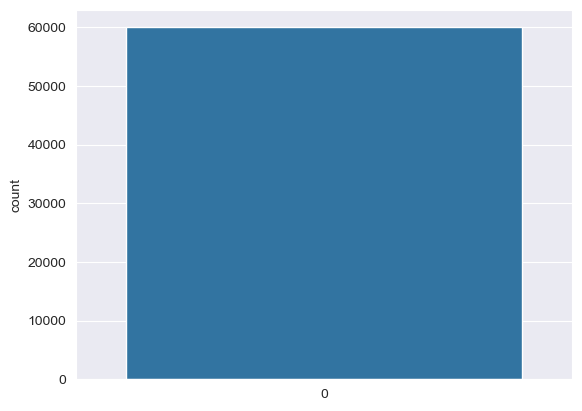

In [3]:
g=sns.countplot(Y_train.iloc[:,0])
Y_train=Y_train.iloc[:,0]
Y_train.value_counts()

In [4]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
test.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

2.3. Normalization
In order to eliminate the effect of the colors and illumination all the data will be normalized to 0-1

In [ ]:
# Normalize and reshape the input data
X_train=X_train/255.0
test=test/255.0

Data Normalization : Normalize and reshape the image data to ensure values are between 0 and 1 and have the correct shape.

# 2.4. Reshaping
# The current dimension of the X_train variable is 784 columns and one row. 
# We will reshape the data to be in a square format (28 x 28 x 1 canal)

In [ ]:
X_train=X_train.values.reshape(-1, 28,28,1)
test=test.values.reshape(-1, 28, 28, 1)

# 2.5. Label encoding
# In this step we will turn the 0-9 labels into a binary like coding, i.e. 2 <- [0,0,1,0,0,0,0,0,0] and so on.

In [ ]:
# One-hot encode the training labels
y_train = to_categorical(y_train, num_classes=10)


One-hot Encode Labels: Convert the categorical labels into a one-hot encoded format using to_categorical.

In [ ]:
# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, shuffle=True)


Split Data: Split the training data into training and validation sets using train_test_split.


In [ ]:
# Data Augmentation to reduce bias
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(X_train)


Data Augmentation: Use ImageDataGenerator for data augmentation to reduce bias in the model.

In [ ]:
# Early Stopping
class custom_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.92):
            self.model.stop_training = True


Early Stopping Callback: Define a custom callback for early stopping if the accuracy reaches a certain threshold.

In [ ]:
# Learning Rate Scheduler
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


Learning Rate Scheduler: Implement a learning rate reduction strategy during training.

In [ ]:
# Build the neural network model
def build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu'))  
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))  
    return model


Build Model: Define the architecture of the neural network using Sequential from Keras.


In [ ]:
# Define the optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# Compile the model
model = build_model()
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


Compile Model: Set up the model for training by specifying the optimizer, loss function, and evaluation metric.

In [ ]:
# Train the model
epochs = 10
batch_size = 64
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_valid, y_valid),
                    verbose=2,
                    callbacks=[learning_rate_reduction])


Train Model: Train the model using the training data, validation data, and the specified callbacks.

In [ ]:
# Save the trained model
model.save("ANNAdigits.h5")

Save Model: Save the trained model for later use.


In [ ]:
# Plot training history
from matplotlib import pyplot as plt

# Plot accuracy and loss curves
f = plt.figure(figsize=(20, 7))
f.add_subplot(121)
plt.plot(history.epoch, history.history['accuracy'], label="accuracy")
plt.plot(history.epoch, history.history['val_accuracy'], label="val_accuracy")
plt.title("Accuracy Curve", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

f.add_subplot(122)
plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")
plt.title("Loss Curve", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()


Plot Training History: Visualize the training and validation accuracy as well as loss over epochs.